In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [13]:
df = pd.read_excel("MMM_data.xlsx")
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df = df.sort_values("DATE").set_index("DATE")
print("Shape:", df.shape)
print("Date range:", df.index.min(), "→", df.index.max())

data_dict = pd.DataFrame([
    ["DATE", "Index", "Calendar date of observation", "Day"],
    ["SALES ($)", "Target", "Total sales revenue", "USD"],
    ["DEMAND ", "Secondary target", "Units sold (quantity of product sold)", "Units"],
    ["Advertising Expenses (SMS)", "Driver", "Ad spend in SMS channel", "USD"],
    ["Advertising Expenses (Newspaper)", "Driver", "Ad spend in Newspaper channel", "USD"],
    ["Advertising Expenses (Radio)", "Driver", "Ad spend in Radio channel", "USD"],
    ["Advertising Expenses (TV)", "Driver", "Ad spend in TV channel", "USD"],
    ["Advertising Expenses (Internet)", "Driver", "Ad spend in Internet channel", "USD"],
    ["GRP (SMS)", "Driver", "Gross Rating Points for SMS ads", "GRP points"],
    ["GRP (Newspaper)", "Driver", "Gross Rating Points for Newspaper ads", "GRP points"],
    ["GRP (Radio)", "Driver", "Gross Rating Points for Radio ads", "GRP points"],
    ["GRP (TV)", "Driver", "Gross Rating Points for TV ads", "GRP points"],
    ["GRP (Internet)", "Driver", "Gross Rating Points for Internet ads", "GRP points"],
    ["CPI", "Control (macro)", "Consumer Price Index (inflation indicator)", "Index"],
    ["CCI", "Control (macro)", "Consumer Confidence Index", "Index"],
    ["PPI", "Control (macro)", "Producer Price Index", "Index"],
    ["Unit Price ($)", "Control", "Average selling price per unit", "USD"],
    ["POS/ Supply Data", "Control", "Supply-side data", "Units"]
], columns=["Variable", "Role", "Description", "Unit"])
display(data_dict)

Shape: (2613, 18)
Date range: 2010-01-01 00:00:00 → 2017-02-25 00:00:00


,Variable,Role,Description,Unit
0,DATE,Index,Calendar date of observation,Day
1,SALES ($),Target,Total sales revenue,USD
2,DEMAND,Secondary target,Units sold (quantity of product sold),Units
3,Advertising Expenses (SMS),Driver,Ad spend in SMS channel,USD
4,Advertising Expenses (Newspaper),Driver,Ad spend in Newspaper channel,USD
5,Advertising Expenses (Radio),Driver,Ad spend in Radio channel,USD
6,Advertising Expenses (TV),Driver,Ad spend in TV channel,USD
7,Advertising Expenses (Internet),Driver,Ad spend in Internet channel,USD
8,GRP (SMS),Driver,Gross Rating Points for SMS ads,GRP points
9,GRP (Newspaper),Driver,Gross Rating Points for Newspaper ads,GRP points


In [14]:
print("\nMissing values:")
print(df.isna().sum())
print("\nStatistics:")
print(df.describe().T)


Missing values:
TV Manufacturing Brand                 0
DEMAND                                 0
Consumer Price Index (CPI)             0
Consumer Confidence Index(CCI)         0
Producer Price Index (PPI)             0
Unit Price ($)                         0
POS/ Supply Data                       0
SALES ($)                              0
Advertising Expenses (SMS)             0
Advertising Expenses(Newspaper ads)    0
Advertising Expenses(Radio)            0
Advertising Expenses(TV)               0
Advertising Expenses(Internet)         0
GRP (NewPaper ads)                     0
GRP(SMS)                               0
GRP(Radio                              0
GRP(Internet)                          0
GRP(TV)                                0
dtype: int64

Statistics:
                                      count          mean            std  \
DEMAND                               2613.0  5.021434e+03    2681.197808   
Consumer Price Index (CPI)           2613.0  1.026100e+02       1.3

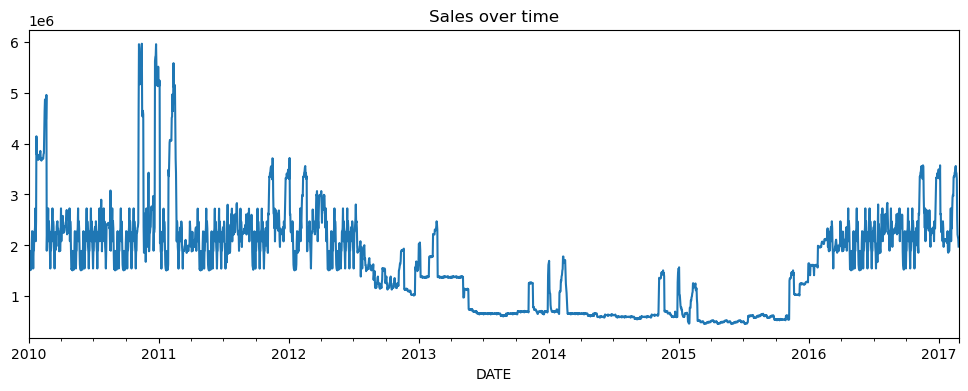

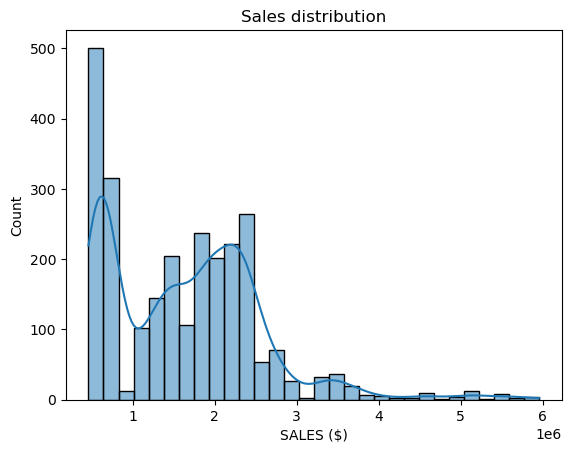

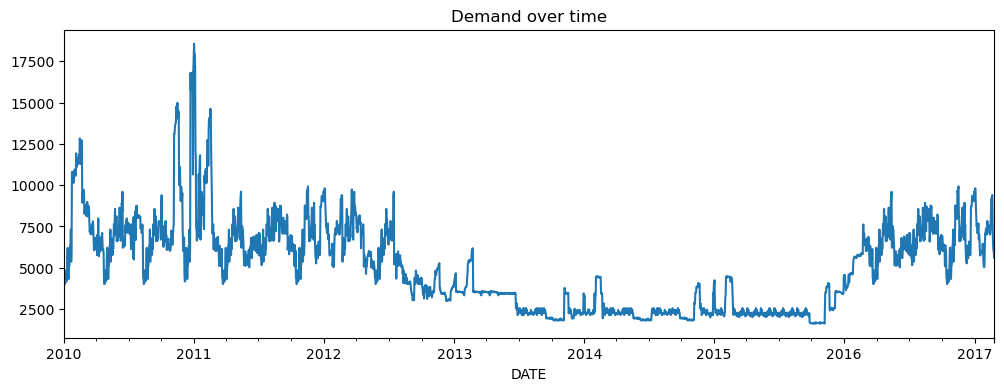

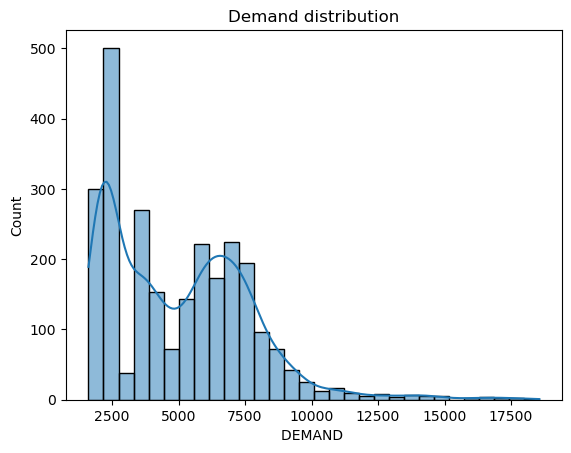

In [15]:
# Visualizations
plt.figure(figsize=(12,4))
df["SALES ($)"].plot()
plt.title("Sales over time")
plt.show()
sns.histplot(df["SALES ($)"].dropna(), bins=30, kde=True)
plt.title("Sales distribution")
plt.show()

plt.figure(figsize=(12,4))
df["DEMAND "].plot()
plt.title("Demand over time")
plt.show()
sns.histplot(df["DEMAND "].dropna(), bins=30, kde=True)
plt.title("Demand distribution")
plt.show()

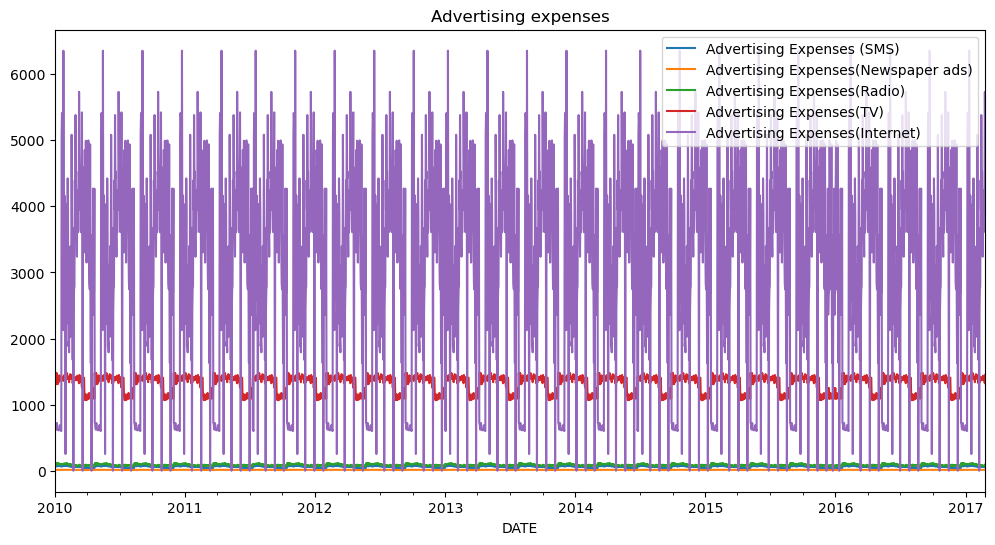

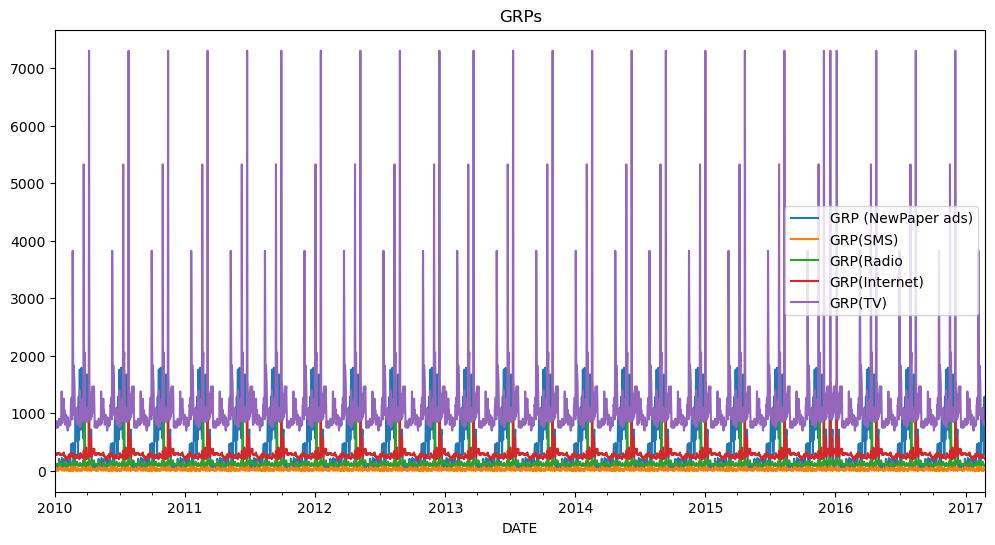

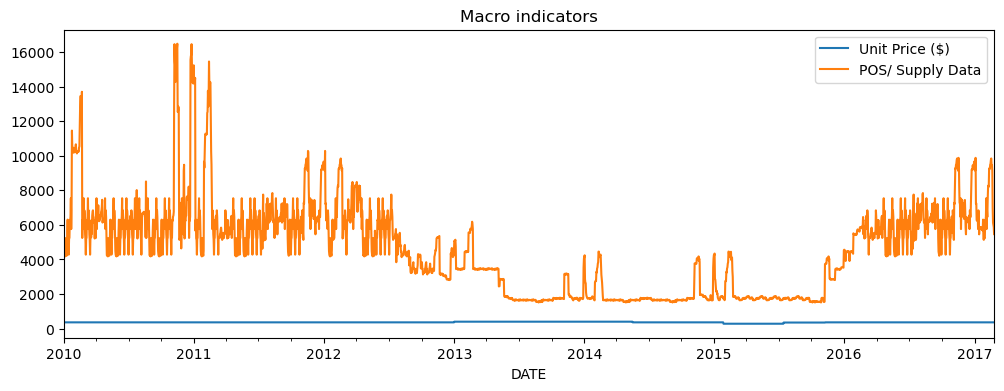

In [16]:
# Advertising and GRP columns
ad = [c for c in df.columns if "Expenses" in c]
grp = [c for c in df.columns if "GRP" in c]
macro = [c for c in df.columns if c in ["CPI","CCI","PPI","Unit Price ($)","POS/ Supply Data"]]
df[ad].plot(figsize=(12,6))
plt.title("Advertising expenses")
plt.show()
df[grp].plot(figsize=(12,6))
plt.title("GRPs")
plt.show()
df[macro].plot(figsize=(12,4))
plt.title("Macro indicators")
plt.show()

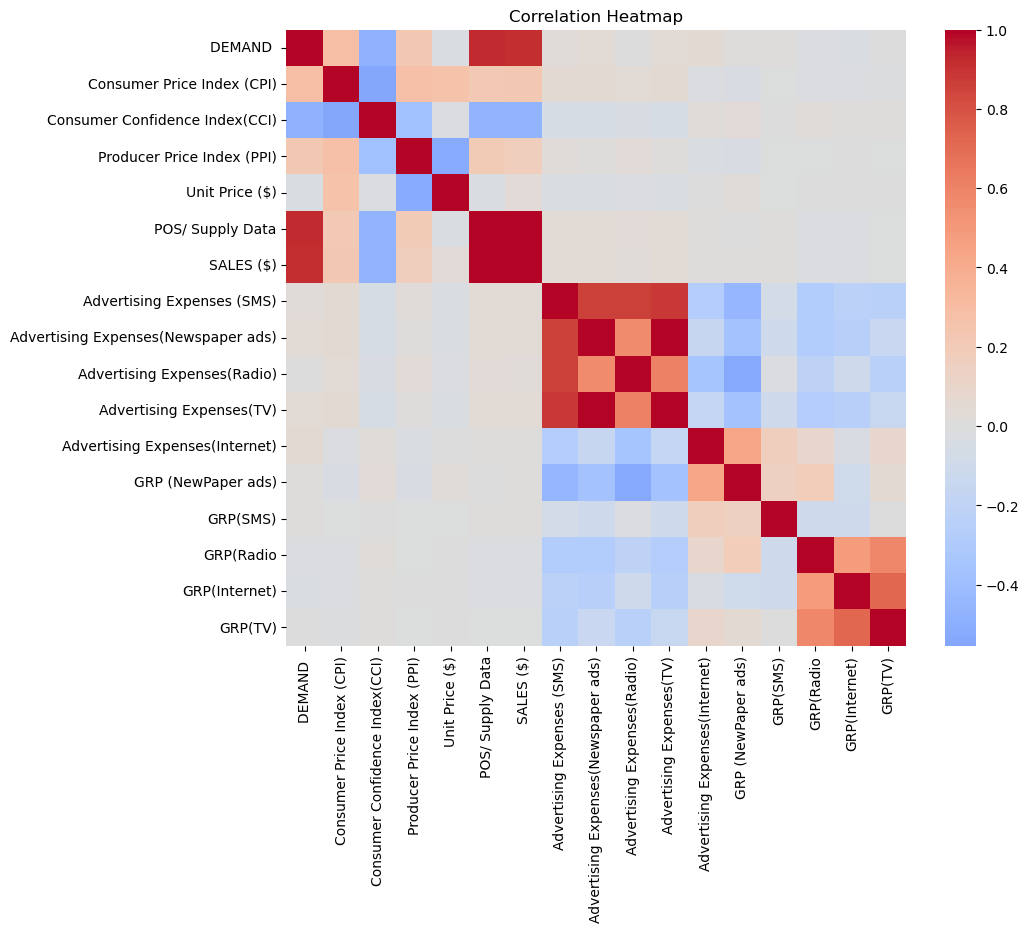

In [17]:
# Correlation 
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

/var/folders/k8/kp1njk3j6ms3bxl4lxwr6xth0000gn/T/ipykernel_27741/3400547033.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["SALES ($)"].resample("M").mean().plot()


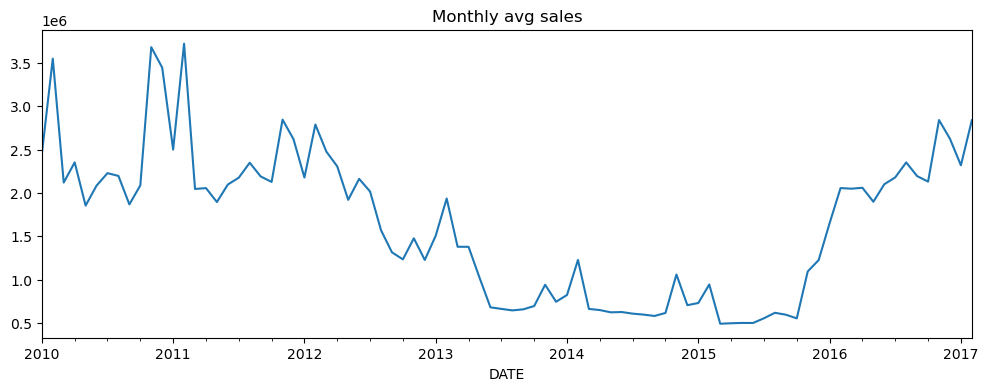

/var/folders/k8/kp1njk3j6ms3bxl4lxwr6xth0000gn/T/ipykernel_27741/3400547033.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["DEMAND "].resample("M").mean().plot()


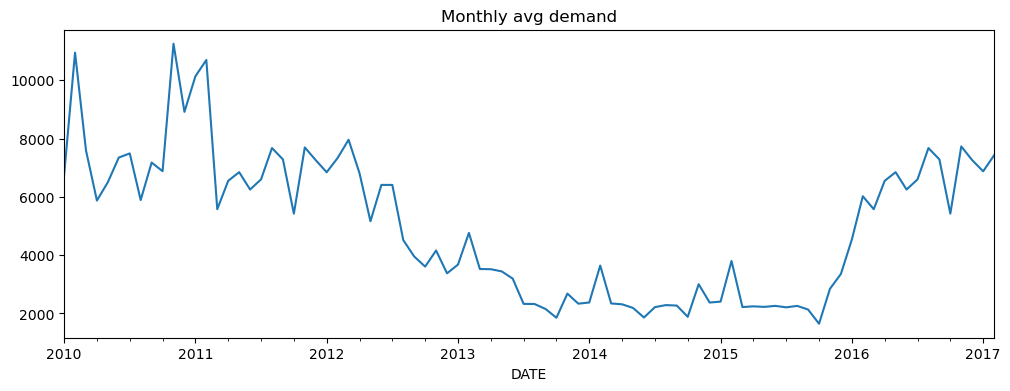

In [18]:
plt.figure(figsize=(12,4)) # Monthly avg sales and demand
df["SALES ($)"].resample("M").mean().plot()
plt.title("Monthly avg sales")
plt.show()

plt.figure(figsize=(12,4))
df["DEMAND "].resample("M").mean().plot()
plt.title("Monthly avg demand")
plt.show()



Log-transform to Sales, Demand, Ad spends, and GRPs.


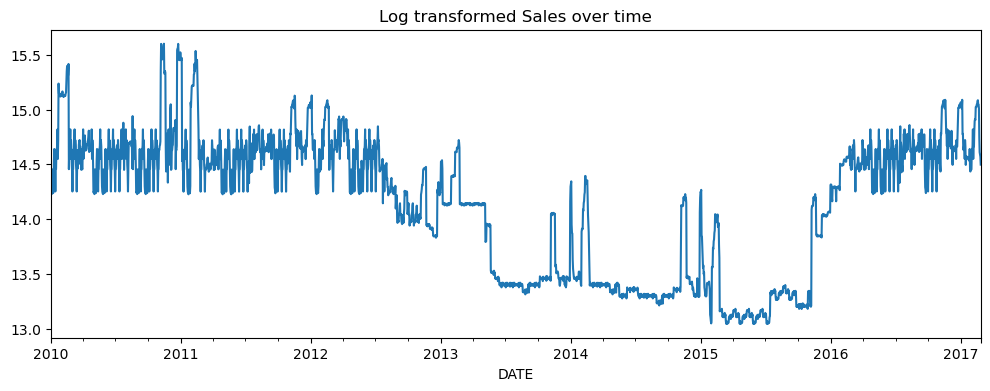

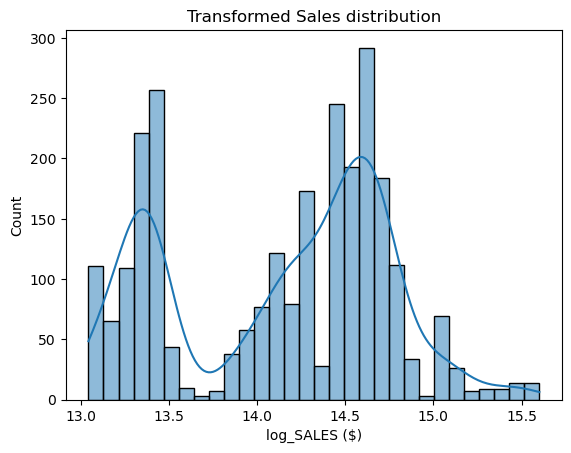

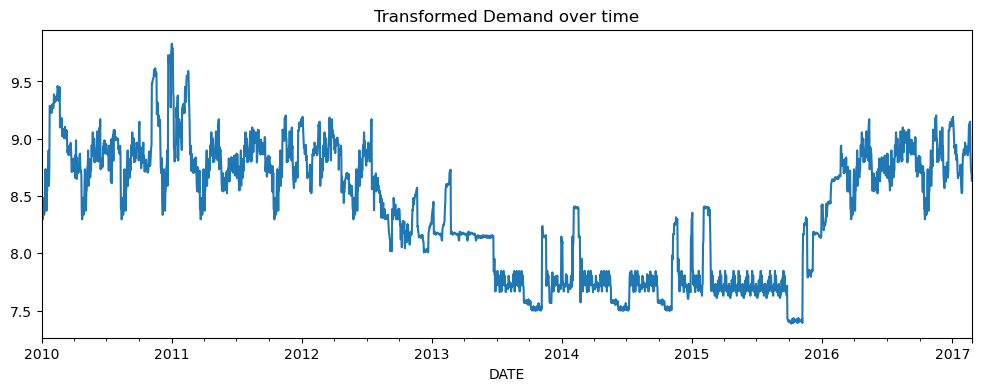

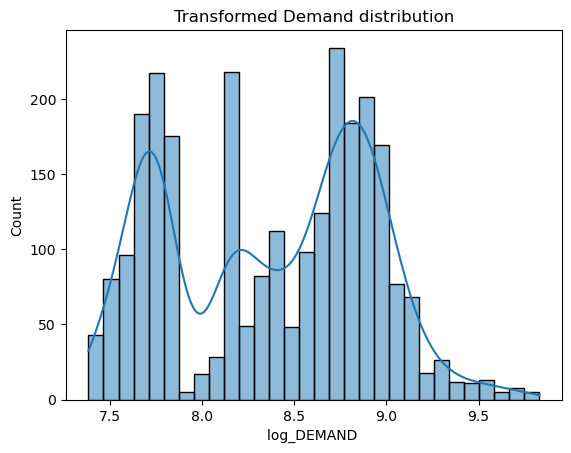

In [19]:
# Log-transform
target_cols = ["SALES ($)", "DEMAND "]
for col in target_cols + ad + grp:
    df[f"log_{col}"] = np.log1p(df[col])
print("\nLog-transform to Sales, Demand, Ad spends, and GRPs.")

plt.figure(figsize=(12,4))
df["log_SALES ($)"].plot()
plt.title("Log transformed Sales over time")
plt.show()
sns.histplot(df["log_SALES ($)"].dropna(), bins=30, kde=True)
plt.title("Transformed Sales distribution")
plt.show()

# Demand
plt.figure(figsize=(12,4))
df["log_DEMAND "].plot()
plt.title("Transformed Demand over time")
plt.show()
sns.histplot(df["log_DEMAND "].dropna(), bins=30, kde=True)
plt.title("Transformed Demand distribution")
plt.show()

In [20]:
print("Variance Inflation Factors")
X = numeric_df.drop(columns=["SALES ($)", "DEMAND "]).fillna(0)
vif = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif.sort_values("VIF", ascending=False))

Variance Inflation Factors
                               Variable          VIF
6   Advertising Expenses(Newspaper ads)  6443.287977
0            Consumer Price Index (CPI)  5947.015317
8              Advertising Expenses(TV)  5880.234554
2            Producer Price Index (PPI)  4099.230218
1        Consumer Confidence Index(CCI)   869.982017
7           Advertising Expenses(Radio)   389.713010
5            Advertising Expenses (SMS)   364.742946
3                        Unit Price ($)   344.530661
13                        GRP(Internet)    13.497084
14                              GRP(TV)     8.400486
9        Advertising Expenses(Internet)     6.683588
4                      POS/ Supply Data     5.064756
10                   GRP (NewPaper ads)     3.665240
12                            GRP(Radio     3.266578
11                             GRP(SMS)     2.203121


In [ ]:
target = ["log_SALES ($)"]   
drivers = [f"log_{c}" for c in ad + grp]  
controls = macro 
model_vars = target + drivers + controls
df_log = df[model_vars].dropna().copy()
print("Shape of df_log:", df_log.shape)
print("\nColumns in df_log:")
print(df_log.columns.tolist())
df_log.head()
df_log.to_excel("df_log.xlsx")

Shape of df_log_ready: (2613, 13)

Columns in df_log_ready:
['log_SALES ($)', 'log_Advertising Expenses (SMS)', 'log_Advertising Expenses(Newspaper ads)', 'log_Advertising Expenses(Radio)', 'log_Advertising Expenses(TV)', 'log_Advertising Expenses(Internet)', 'log_GRP (NewPaper ads)', 'log_GRP(SMS)', 'log_GRP(Radio', 'log_GRP(Internet)', 'log_GRP(TV)', 'Unit Price ($)', 'POS/ Supply Data']
